In [1]:
import numpy as np
import numpy.linalg as npl
from scipy import signal
from scipy import interpolate
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import time
import copy
import warnings
import scipy.signal as scs
warnings.filterwarnings('ignore')

In [2]:
import cv2

In [143]:
def visualize_block(img, block_size):

    f = 1 # facteur de recouvrement
    bs = block_size #plus court pour le code
    n,m = np.shape(img)
    fig,ax = plt.subplots(1,1,figsize=(25,15))
    ax.imshow(img)
    ncol = int(m // bs )
    to_crop_horizontal = m % bs
    nrow = int(n // bs )
    to_crop_vertical = n % bs

    nb_block = nrow * ncol      # Nombre de blocs dans l'image
    print(f"Info:\n\
    -> Shape de l'image : {n}x{m}px\n\
    -> Block size : {block_size}px\n\
    -> Nombre de blocs : {nb_block} pbs d'optim à résoudre\n\
    -> A crop horizontalement pour tomber pile : {to_crop_horizontal}px\n\
    -> A crop verticalement pour tomber pile : {to_crop_vertical}px\n")
    for i in range(nrow) :
        for j in range(ncol) :
            rect = patches.Rectangle( (j * bs, i * bs), bs, bs,linewidth=1,edgecolor='k',facecolor='none')
            ax.add_patch(rect)
    plt.show()
    
# f,g=get_images(16)

f = cv2.copyMakeBorder( f, 24, 24, 24, 24, cv2.BORDER_CONSTANT)
# g = cv2.copyMakeBorder( f, 24, 24, 24, 24, cv2.BORDER_CONSTANT)

# np.shape(f)

In [ ]:
### TODO
# crop l'image à un multiple de 16
# ajouter le padding de p = 7
# ajuster le parcours par bloc pour ne pas prendre en compte le padding
# boucler sur tous les blocs 16x16 de l'image
# renvoyer une matrice de vecteurs déplacement


Info:
    -> Shape de l'image : 1094x1934px
    -> Block size : 16px
    -> Nombre de blocs : 8160 pbs d'optim à résoudre
    -> A crop horizontalement pour tomber pile : 14px
    -> A crop verticalement pour tomber pile : 6px



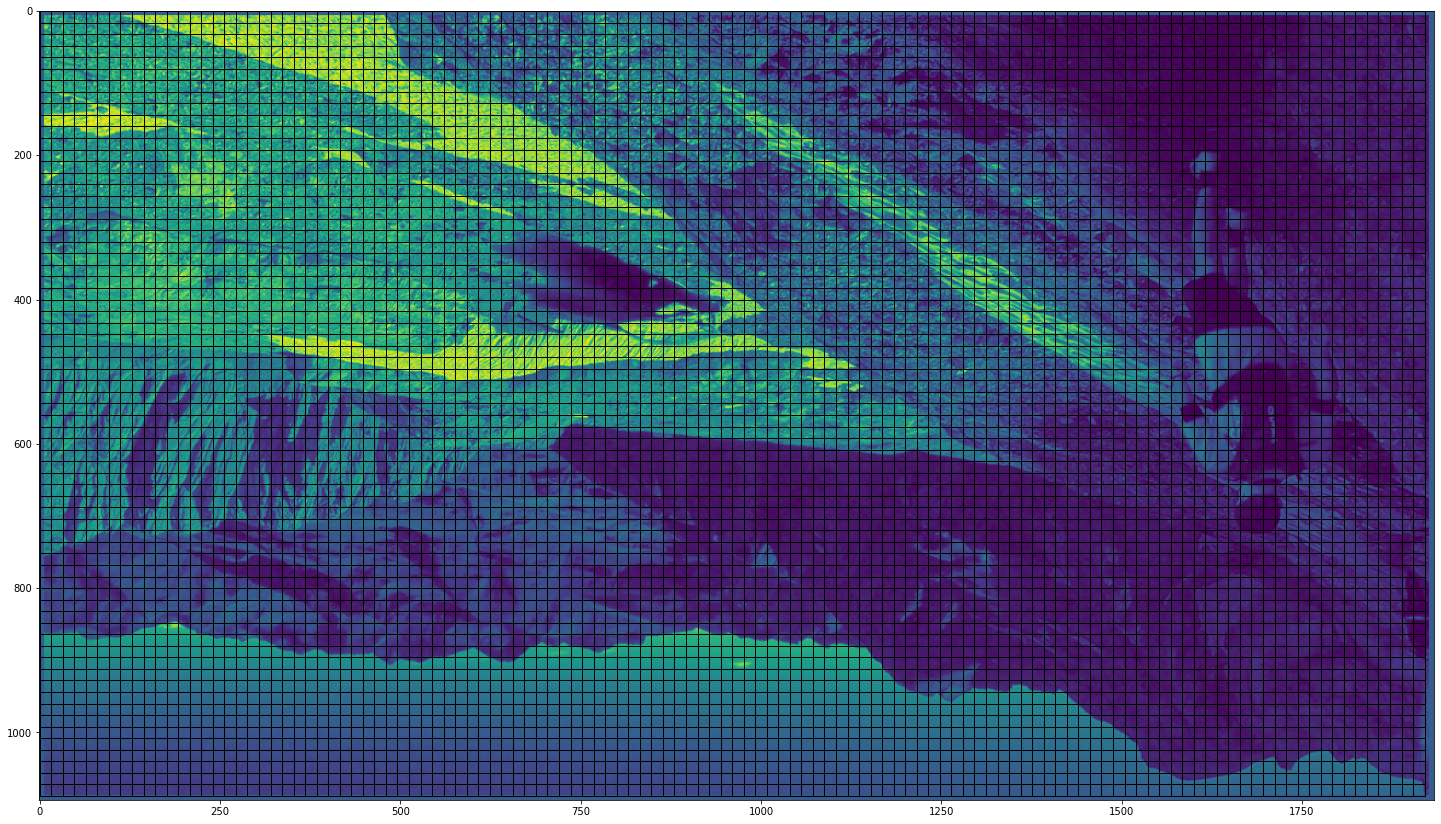

In [144]:
visualize_block(iref, 16)

In [4]:
def get_images(n) :
    sigma=0.1
    [X,Y]=np.meshgrid(np.linspace(-1,1,n),np.linspace(-1,1,n), indexing='xy')
    Z=np.sqrt(X*X+Y*Y)
    im1=np.zeros((n,n))
    im1[Z<=.7]=1.
    im1[Z<=.3]=.5
    im1[Z<=.1]=.7
    im2=np.zeros((n,n));
    Z=np.sqrt((X-.3)**2+(Y+.2)**2)
    im2[Z<=.7]=1
    im2[Z<=.3]=.5
    im2[Z<=.1]=.7
    G=np.fft.fftshift(np.exp(-(X**2+Y**2)/sigma**2))
    f=np.real(np.fft.
              ifft2(np.fft.fft2(G)*np.fft.fft2(im1)))
    g=np.real(np.fft.ifft2(np.fft.fft2(G)*np.fft.fft2(im2))) 
    f=f/np.max(f)
    g=g/np.max(g)
    g = np.roll(f, (2,1))
    return f,g

In [5]:
# b,g=get_images(32)

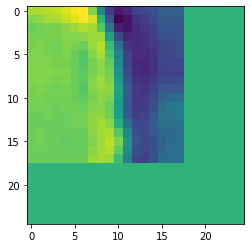

In [140]:
iref = np.flip(np.array(Image.open("img/1.jpg"))[:,:,0], axis = 0)
iref = (iref - iref.mean()) / iref.std()
axis0 = 2
axis1 = 2
ipred = np.roll(np.roll(iref,axis0,axis=0),axis1,axis=1)
p = 7
iref = cv2.copyMakeBorder( iref, p,p,p,p, cv2.BORDER_CONSTANT)
plt.imshow(iref[-25:,-25:])

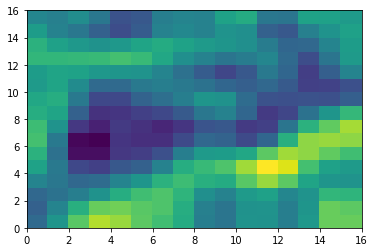

In [141]:
## Le macroblock dont on veut étudier le déplacement
block =iref[p:p+16,p+ 500:p+516]
plt.pcolormesh(block)

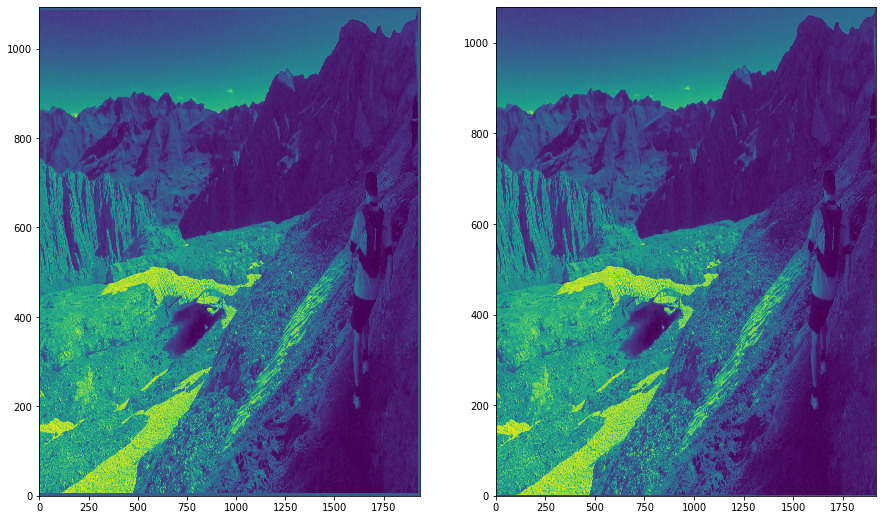

In [134]:
fig, ax = plt.subplots(1,2, figsize=(15,9))
ax[0].pcolormesh(f)
ax[1].pcolormesh(ipred)

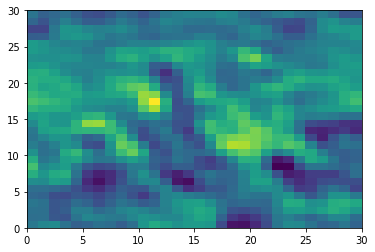

In [96]:
# Big macroblock où on va chercher notre macroblock sur l'autre image
p = 7
search_zone = ipred[400 - p:416 + p, 500 - p:516 + p]
plt.pcolormesh(search_zone)

In [97]:
np.shape(search_zone)

(30, 30)

In [129]:
n,m = np.shape(search_zone)
x_mid = n // 2
y_mid = m // 2
# print(x_mid)
bs = 16
x_mid_start = x_mid - (bs//4)
y_mid_start = y_mid - (bs//4)

s = 1
CF = np.zeros(((bs//2)**2, 3))
for i in range(bs//2):
    for j in range(bs//2):
    
        x_mid_subblock = x_mid_start + s*i
        y_mid_subblock = y_mid_start + s*j
        c = npl.norm(block - search_zone[x_mid_subblock - (bs//2): x_mid_subblock + (bs//2), y_mid_subblock - (bs//2): y_mid_subblock + (bs//2)])
        CF[i * (bs//2) + j, 0] = x_mid_subblock - x_mid
        CF[i * (bs//2) + j, 1] = y_mid_subblock - y_mid
        CF[i * (bs//2) + j, 2] = c


In [130]:
id_min = np.argmin(CF[:,2])
x_opti = CF[id_min, 0]
y_opti = CF[id_min, 1]

In [131]:
print(x_opti, y_opti)

2.0 2.0


In [ ]:
## comparer block translaté de x_opti et y_opti

In [ ]:
#         cost(block, search_zone[x_mid_subblock - (bs//2): x_mid_subblock + (bs//2), y_mid_subblock - (bs//2): y_mid_subblock + (bs//2)])
#         fig, ax = plt.subplots(1,3, figsize=(20,5))
#         ax[0].pcolormesh(block)
#         ax[1].pcolormesh(search_zone[x_mid_subblock - (bs//2): x_mid_subblock + (bs//2), y_mid_subblock - (bs//2): y_mid_subblock + (bs//2)])
        
#         ax[2].pcolormesh(search_zone[x_mid_subblock - (bs//2): x_mid_subblock + (bs//2), y_mid_subblock - (bs//2): y_mid_subblock + (bs//2)] - block)
# #         ax[2].scatter(x_mid_subblock, y_mid_subblock, s=25, c='red', marker='o')
#         ax[2].set_title(f"{i}, {j}, {c}")

In [30]:
def block_route(iref, ipred, bs ): # J'ai une variante parallelisable en réserve mais ma librairie fonctionne pas sur colab
    """
    Application d'une fonction func pour chaque blocs de l'image.
    """
    n, m = np.shape(iref)[:2]
    ncol = int(m // bs)
    nrow = int(n // bs)
    padding = 0 # à voir plus tard
    tabx = [] # stockage décalage x
    taby = [] # stockage décalage y
    print(ncol, nrow)
    for i in range(nrow):
        for j in range(ncol):
        # if i * ncol + j  >= start and i * ncol + j < end: # Vérification que le processus doit bien traiter ce bloc
            search_zone = iref[i*bs - p:416 + p, 500 - p:516 + p]
            block = iref[p + i * bs : p + i * (bs+1), p+ j * bs : p + j * (bs+1)]
            calcul_deplacement(search_zone, block)

#             orig, temp, corr, x, y = decalageBloc(block_pred, template, padding) # Calcul du déplacement
#             xm = x - bs / 2
#             ym = y - bs / 2
#             tabx.append(xm)
#             taby.append(ym)
    return tabx, taby


(26, 26)


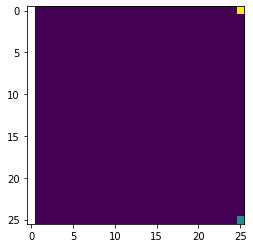

In [44]:
corr = scs.correlate2d(f,g, boundary="symm")
print(np.shape(corr))
plt.imshow(corr)

(6, 6)


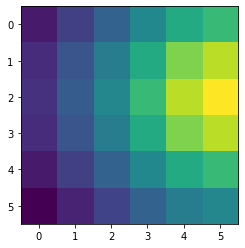

In [48]:
corr = scs.correlate2d(g,f, mode='valid', boundary="wrap")
print(np.shape(corr))
plt.imshow(corr)

(16, 16)


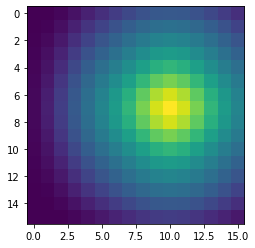

In [49]:
corr = scs.correlate2d(g,f, mode='same')
print(np.shape(corr))
plt.imshow(corr)

In [230]:
def interpol(f,ux,uy) :
    # function that computes f \circ Id+u and interpolates it on a mesh
    nx,ny=f.shape
    ip=interpolate.RectBivariateSpline(np.arange(nx),np.arange(ny),f, kx=1,ky=1)
#     ip=interpolate.RegularGridInterpolator(np.arange(nx),f)
    
    [X,Y]=np.meshgrid(np.arange(nx),np.arange(ny), indexing='ij')
    X=X+ux
    Y=Y+uy
    return np.reshape(ip.ev(X.ravel(),Y.ravel()),(nx,ny))
#     return np.roll(f, (ux,uy))

In [231]:
def dx(im) :
    d=np.zeros(im.shape)
    d[:-1,:]=im[1:,:]-im[:-1,:]
    return d #retourne dx*im
def dy(im) :
    d=np.zeros(im.shape)
    d[:,:-1]=im[:,1:]-im[:,:-1]
    return d
def dxT(im) :
    d=np.zeros(im.shape)
    d[0,:] = -im[0,:]
    d[1:-1,:] = im[:-2,:] - im[1:-1:,:]
    d[-1,:] = im[-2,:]
    return d  
def dyT(im) :
    d=np.zeros(im.shape)
    d[:,0] = -im[:,0]
    d[:,1:-1] = im[:,:-2] - im[:,1:-1]
    d[:,-1] = im[:,-2]    
    return d

In [232]:
def objective_function(f,g,ux,uy) :
    fu=interpol(f,ux,uy)
    E = 1/2*npl.norm(fu  - g)**2
    obj = E
    return obj,fu

In [233]:
def linesearch(ux,uy,step,descentx,descenty,obj_old,f,g) :
    step=2*step
    tmpx=ux-step*descentx
    tmpy=uy-step*descenty
    obj,fu=objective_function(f,g,tmpx,tmpy)
    while obj >obj_old and step > 1.e-8:
        step=0.5*step
        tmpx=ux-step*descentx ->> ok pour le tp 
        tmpy=uy-step*descenty 
        obj,fu=objective_function(f,g,tmpx,tmpy)
    return tmpx,tmpy,step

In [234]:
def RecalageDG(f,g,nitermax,stepini,modulo) : #ajout du param modulo pour contrôler l'affichage des itérations
    ux = 0
    uy = 0  
    CF=[]
    step_list=[]
    niter=0
    step=stepini
    while niter < nitermax and step > 1.e-8 : 
        niter+=1
        obj,fu=objective_function(f,g,ux,uy)
        CF.append(obj)   

        gradEx = (fu - g)*dx(fu)
        gradEy = (fu - g)*dy(fu)
        print(np.shape(gradEx))
        
        gradE = np.array([gradEx, gradEy])
        
        # Gradient of E+R at point u
        gradx = gradEx
        grady = gradEy 
        
        
        ux,uy,step=linesearch(ux,uy,step,gradx,grady,obj,f,g)
        step_list.append(step)
        if (niter % modulo ==0) :
            print('iteration :',niter,' cost function :',obj,'step :',step)
    return ux,uy,np.array(CF),np.array(step_list),niter

In [235]:
nitermax = 10000
step0 = 0.01
modulo = 100
ux,uy,CF,step,niter = RecalageDG(f,g,nitermax,step0,modulo)


(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)
(16, 16)


In [215]:
np.mean(ux)

0.022822639410064835

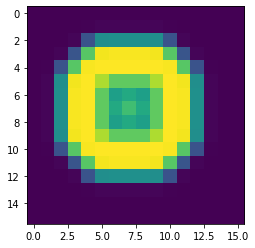

In [216]:
plt.imshow(f)

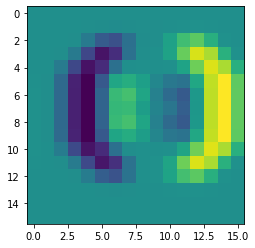

In [217]:
plt.imshow(g - interpol(f, np.mean(ux) * np.ones(np.shape(f)), np.mean(uy) * np.ones(np.shape(f))))

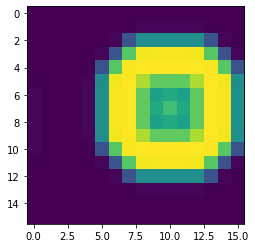

In [218]:
plt.imshow(g)

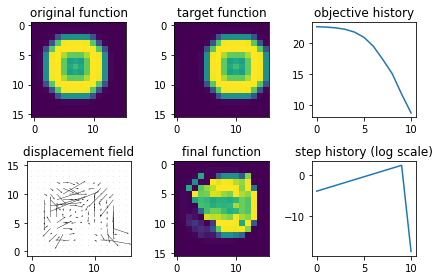

In [236]:
print_results(f,g, ux,uy, step, CF)

In [69]:
def print_results(f,g, ux,uy, step, CF):
    fig, ax = plt.subplots(2,3)
    ax[0,0].imshow(f)
    ax[0,0].set_title('original function')
    ax[0,1].imshow(g)
    ax[0,1].set_title('target function')
    ax[1,0].quiver(ux, uy)
    ax[1,0].set_title('displacement field')
    ax[1,1].imshow(interpol(f,ux, uy))
    ax[1,1].set_title('final function')
    ax[0,2].plot(CF)
    ax[0,2].set_title('objective history')
    ax[1,2].plot(np.log(step))
    ax[1,2].set_title('step history (log scale)')

    #Affichage de certaines données sous forme de tableau    
   
    
    plt.tight_layout()
    plt.show()

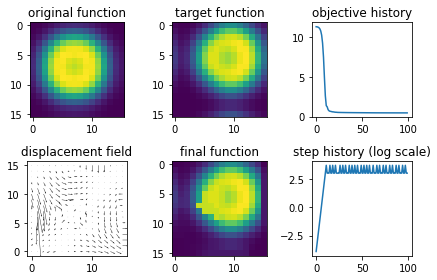